In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [13]:
xmin = -2             #minimum x value
xmax = 2              #maximum x value
Nx = 101              #number of x values
dx = (xmax-xmin)/Nx   #delta x

tmax = 15             #maximum t value
dt = 0.02             #timestep size
iterations = int(tmax/dt)

c = -0.8              #velocity
CFL = c*dt/dx         #CFL

x = np.linspace (xmin, xmax, Nx)         #x values as vector
t = np.linspace (0, tmax, iterations+1)  #t values as vector
U = np.zeros((iterations+1, Nx))         #matrix to store approximations
U[0,:] = np.exp(-0.5*(3*x**2))           #IC

In [14]:
assert abs(CFL)<=1

In [27]:
for n in range (0, iterations):  #for time n...
    if (c>0):                    #upwind for positive velocity
        U[n+1,0] = U[n, -1]      #first x val of current row approximated as the last x val of previous row
        for i in range (1, Nx):  #start:second x val. stop: last x val. do upwind
            U[n+1, i] = U[n,i] - CFL*(U[n,i] - U[n,i-1])
        
    else:                        #downwind for negative velocity
        U[n+1,-1] = U[n, 0]      #last x val of next row approximated as the first x val of current row
        for i in range (0, Nx-1):#start: first x val. stop:second-to-last x val. do downwind
            U[n+1, i] = U[n,i] - CFL*(U[n, i+1]-U[n,i])
        

<IPython.core.display.Javascript object>


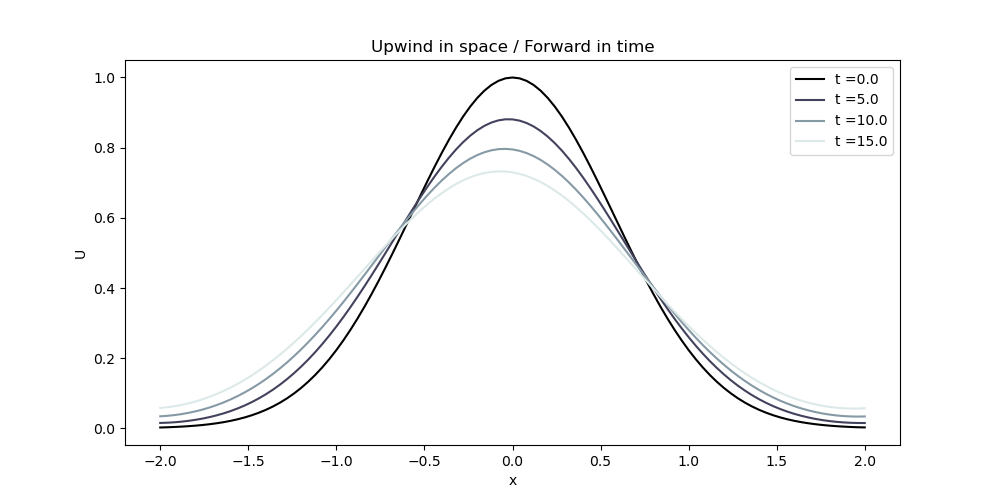

In [28]:
fig, ax = plt.subplots(1,1, figsize=(10,5))           #create axes
vcolors = plt.cm.bone(np.linspace(0, 0.9, 4))         #colour scheme for plots
timestamps = np.linspace(0, iterations, 4)            #timestamps to create plots for
for i in range (0,4):                                 #create plots
    count = int(timestamps[i])
    ax.plot(x, U[count,:], '-', color = vcolors[i], label = 't ='+str(count*dt))

plt.title ('Upwind in space / Forward in time')
plt.xlabel('x')
plt.ylabel('U')
plt.legend()
plt.show()